In [1]:
import matplotlib
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
sys.path.append('training/')
sys.path.append('./')
from config_training import config 
sys.path.append('preprocessing/')
from step1 import *
from full_prep import lumTrans
from layers import nms,iou
import nibabel as nib

/home/anaconda/lib/python2.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


# Note:

1. Within a compute node, CD to /tmp and clone this git repository.
2. Datasets are located in PSG Cluster: /datasets/dsb/unzipped
3. Run the docker container mounting the source code repo and data dir, like:
```
nvidia-docker run -v /datasets/dsb/unzipped:/datasets -v /tmp/DSB2017-1:/home/DSB2017-1 -it --ipc=host -p 8888:8888 nvcr.io/nvidian/sae/ct_lung_nodule /bin/bash
```
4. CD to ~/DSB2017-1/training/detector , run the detector code, like:
```
python main2.py --model res18 --resume ../../model/detector.ckpt --test 1 --save-dir /datasets/sample_volumes --input_file /datasets/sample_volumes/8ecf6be8ae631c6dd694c9638a02b45_clean.nii
```
5. For the input_file specified, it'll generate the bounding-box file saved in the save-dir specified under bbox/
6. With these two files (image, bounding box), they can be visualized like below

In [3]:
imi = '/datasets/sample_volumes/031b7ec4fe96a3b035a8196264a8c8c3_clean.nii' # input file
pbi = '/datasets/sample_volumes/bbox/031b7ec4fe96a3b035a8196264a8c8c3_pbb.npy' # bounding box generated
    
img = nib.load(imi).get_data()
pbb = np.load(pbi)

pbb = pbb[pbb[:,0]>-1]
pbb = nms(pbb, 0.05)

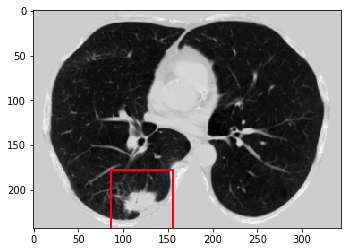

In [4]:
box = pbb[0].astype('int')[1:]

ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]], 'gray')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)

# Note:

1. box[2]-box[3] is the bottom-left corner's x-coordinate.
2. box[1]-box[3] is the bottom-left corner's y-coordinate.
3. These (x,y) coordinate is the middle slice of the 3D-cube.
4. To get the 3D cube, we get the same bounding box from (slice - round(box[3]/2)) to (slice + round(box[3]/2)), like

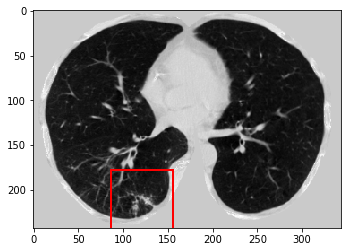

In [5]:
box = pbb[0].astype('int')[1:]

ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]-np.round(box[3]/2)], 'gray')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)

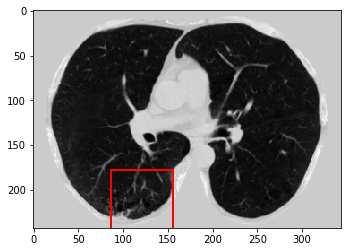

In [6]:
box = pbb[0].astype('int')[1:]

ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]+np.round(box[3]/2)], 'gray')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)

# Note:

1. There are len(pbb) as many nodules.
2. We can display them like

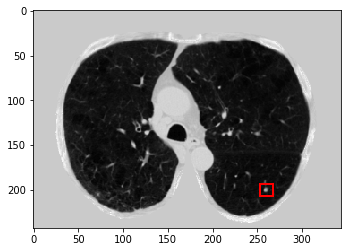

In [7]:
box = pbb[1].astype('int')[1:]

ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]], 'gray')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)

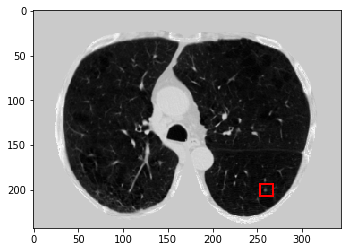

In [8]:
box = pbb[1].astype('int')[1:]

ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]-np.round(box[3]/2)], 'gray')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)

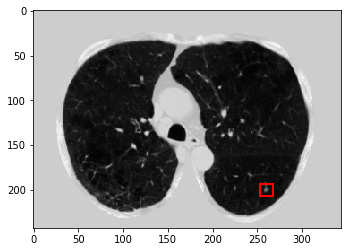

In [9]:
box = pbb[1].astype('int')[1:]

ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]+np.round(box[3]/2)], 'gray')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)